<a href="https://colab.research.google.com/github/ubsuny/CompPhys/blob/Colab/DataAnalysis%20/Fitting/IntroToPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to pandas

based on https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [1]:
import pandas as pd
import numpy as np

In [ ]:
ts = pd.Series([1,2,3,4,5])

In [ ]:
ts

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
df = pd.DataFrame(
    {"a": [1,3],
     "b": [2,4],
     "c": [3,5]}
)

In [ ]:
df.to_csv("myownfile.csv")

In [ ]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [ ]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
df.to_numpy()

array([[1, 2, 3],
       [3, 4, 5]])

In [ ]:
df.dtypes

a    int64
b    int64
c    int64
dtype: object

In [ ]:
df.describe()

,a,b,c
count,2.000000,2.000000,2.000000
mean,2.000000,3.000000,4.000000
std,1.414214,1.414214,1.414214
min,1.000000,2.000000,3.000000
25%,1.500000,2.500000,3.500000
50%,2.000000,3.000000,4.000000
75%,2.500000,3.500000,4.500000
max,3.000000,4.000000,5.000000


In [2]:
df = pd.read_csv("query.csv",parse_dates=["time"])

In [3]:
df['magType'] = df['magType'].astype("category")

In [ ]:
df.dtypes

time               datetime64[ns, UTC]
latitude                       float64
longitude                      float64
depth                          float64
mag                            float64
magType                       category
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                             object
id                              object
updated                         object
place                           object
type                            object
horizontalError                float64
depthError                     float64
magError                       float64
magNst                         float64
status                          object
locationSource                  object
magSource                       object
dtype: object

In [ ]:
df["time"][0]

Timestamp('2023-07-16 06:48:21.158000+0000', tz='UTC')

In [4]:
df = df.set_index("time")

<Axes: xlabel='time'>

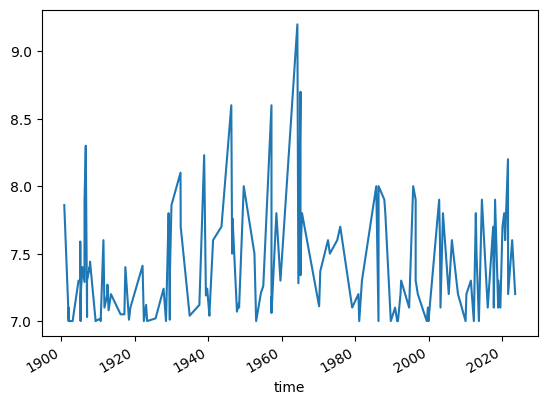

In [5]:
df["mag"].plot()

<Axes: >

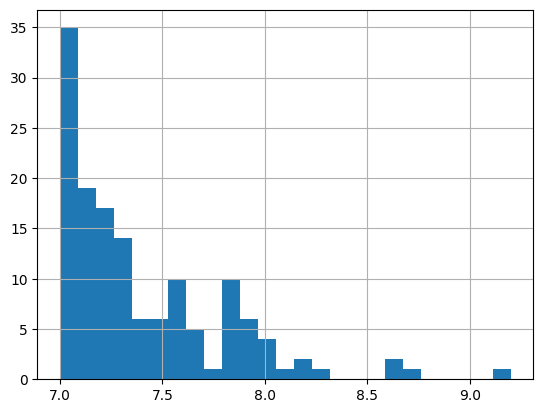

In [6]:
df['mag'].hist(bins=25)

In [7]:
count, division = pd.np.histogram(df['mag'],bins=25)

<ipython-input-7-e4d6499c551b>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  count, division = pd.np.histogram(df['mag'],bins=25)


In [8]:
from matplotlib import pyplot as plt

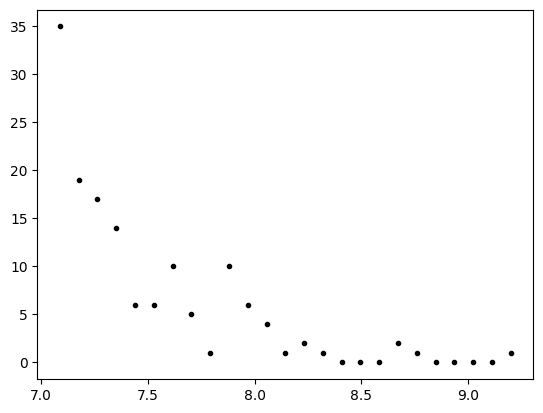

In [9]:
plt.plot(division[:-1]-(division[1]-division[2]),count, 'k.')

In [10]:
def least_squares(x, y):
    """Perform a least-squares fit to data (x,y)

    Args :
       x : x values
       y : y values

    Returns :
       a : intercept
       b : slope
       sigma : total uncertainty (sqrt(variance/(n-2)))
       sigma_a : uncertainty on a
       sigma_b : uncertainty on b

    """

    n = len(x)   # number of galaxies

    if n <= 2 :
        print ('Error! Need at least two data points!')
        exit()

    # Compute all of the stat. variables we need
    s_x = np.sum(x)
    s_y = np.sum(y)
    s_xx = np.sum( x**2 )
    s_xy = np.sum( x*y )
    denom = n * s_xx - s_x**2
    if abs( denom ) < 0.000001 :
        print ('Error! Denomominator is zero!')
        exit()

    # Compute y-intercept and slope
    a = (s_xx * s_y - s_x * s_xy) / denom
    b = (n*s_xy - s_x * s_y) / denom

    # Compute uncertainties
    if n > 2 :
          sigma = np.sqrt(np.sum((y - (a+b*x))**2 ) / (n-2))
          sigma_a = np.sqrt(sigma**2 * s_xx / denom)
          sigma_b = np.sqrt(sigma**2 * n / denom)
    else :
          sigma = 0.
          sigma_a = 0.
          sigma_b = 0.

    return [a, b, sigma, sigma_a, sigma_b]

In [12]:
a,b, sigma, sigma_a, sigma_b = least_squares(division[:-1]-(division[1]-division[2]),count)

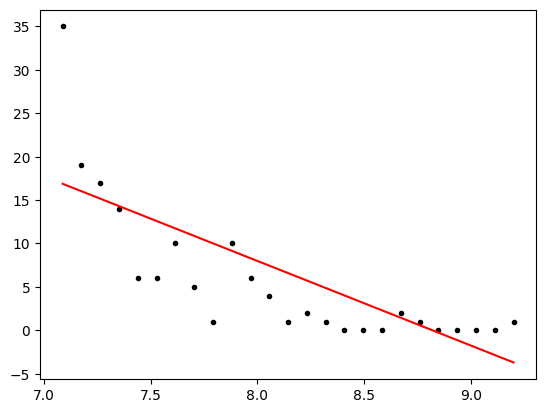

In [20]:
plt.plot(division[:-1]-(division[1]-division[2]),count, 'k.')
plt.plot(division[:-1]-(division[1]-division[2]),Yfit, 'r-')

In [14]:
Yfit = a+ b*division[:-1]-(division[1]-division[2])

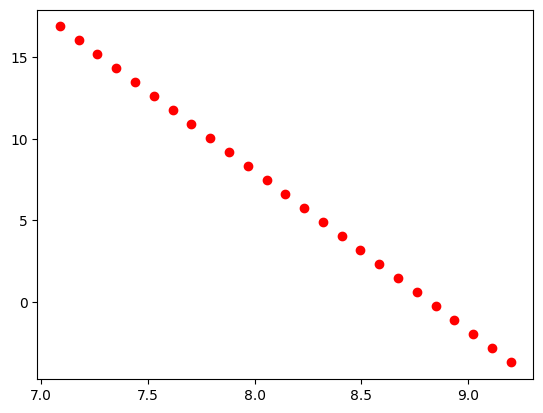

In [17]:
plt.plot(division[:-1]-(division[1]-division[2]),Yfit, 'ro')

In [ ]:
np.var(data)

0.6666666666666666

In [ ]:
df2 = pd.DataFrame(data,columns=["data"])

In [ ]:
df2.mean()

data    10.0
dtype: float64

In [ ]:
df2.var(ddof=0)

data    0.666667
dtype: float64